### iSIM - sigma 
Jupyter notebook containing the testing of the stratified sampling, random sampling, pairwise for 30 ChEMBL subsets

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import glob
from isim_sigma.sigma import stratified_sigma, random_sigma
from isim_sigma.utils import pairwise_average
import numpy as np
import pandas as pd

The `stratified_sigma` function performs stratified sampling of n molecules from the dataset, and calculates the pairwise comparisons between the n molecules to estimate the standard deviation of the whole set. 

### RDKit

Let's test the stratified sigma with several n sampled molecules, random sampling and the total pairwise standard deviation calculation. We will use 30 ChEMBL subsets with RDKit fingerprints.  

In [3]:
# All computations in this script will use one of the similarity indices "JT", "RR" or "SM"
sim_index = 'JT'

In [5]:
# Computation of the standard deviation of the Tanimoto similarities for the complete sets of compounds, stratified sampling, random sampling.
pairwise_sigmas = []
stratified_10 = []
stratified_25 = []
stratified_50 = []
random_trial_1 = []
random_trial_2 = []
random_trial_3 = []

for file in glob.glob("rdkit/*.npy"):
    # Load the fingerprints
    fps = np.load(file, mmap_mode='r')

    # Calculate the pairwise Tanimoto similarities standard deviation
    pairwise_sigmas.append(pairwise_average(fps, n_ary=sim_index)[1])

    # Calculate the stratified sampling Tanimoto similarities standard deviation, with 10, 25, 50 sampled compounds
    stratified_10.append(stratified_sigma(fps, 10, sim_index))
    stratified_25.append(stratified_sigma(fps, 25, sim_index))
    stratified_50.append(stratified_sigma(fps, 50, sim_index))

    # Calculate the random sampling Tanimoto similarities standard deviation, all sampling 50 compounds
    random_trial_1.append(random_sigma(fps, 50, sim_index))
    random_trial_2.append(random_sigma(fps, 50, sim_index))
    random_trial_3.append(random_sigma(fps, 50, sim_index))

# Create a dataframe with the results
df = pd.DataFrame({
    'pairwise': pairwise_sigmas,
    'stratified_10': stratified_10,
    'stratified_25': stratified_25,
    'stratified_50': stratified_50,
    'random_trial_1': random_trial_1,
    'random_trial_2': random_trial_2,
    'random_trial_3': random_trial_3
})

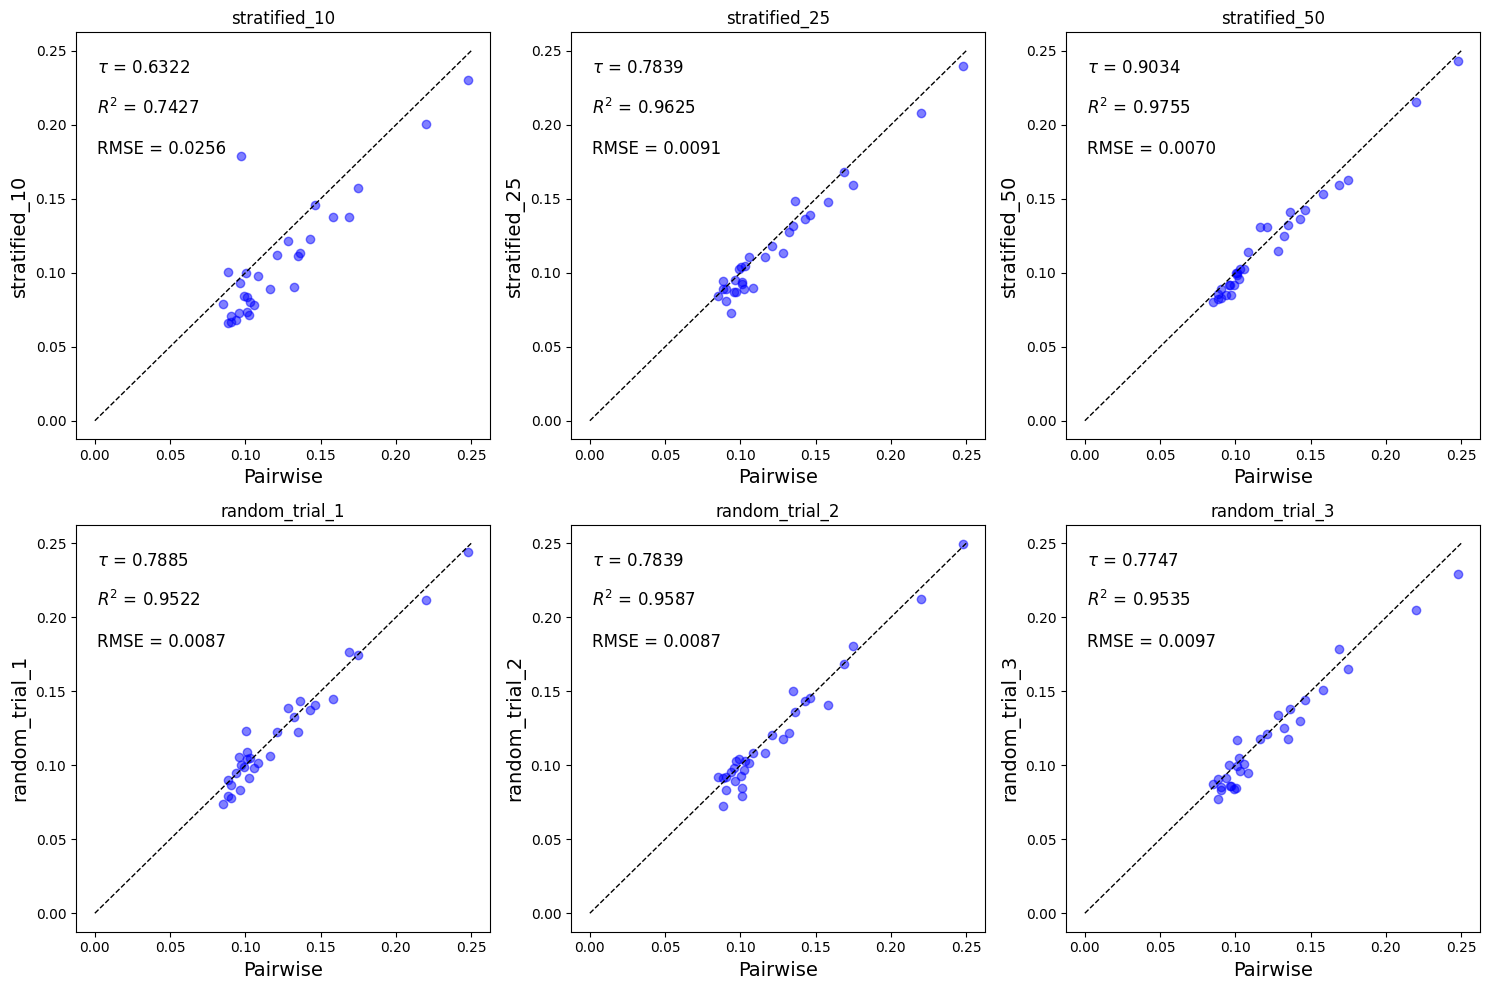

In [6]:
# Plot the results in a 6 panel figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, method in enumerate(df.columns[1:]):
    axs[i].scatter(df['pairwise'], df[method], alpha=0.5, color = 'blue')
    axs[i].set_xlabel('Pairwise', fontsize=14)
    axs[i].set_ylabel(method, fontsize=14)
    axs[i].set_title(f'{method}')
    axs[i].plot([0, 0.25], [0, 0.25], color='black', lw=1, linestyle='--')

    # Annotation of the Kendall's tau correlation coefficient, R^2 value and RMSE
    tau, _ = kendalltau(df['pairwise'], df[method])
    axs[i].annotate(f'$\\tau$ = {tau:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    R2 = np.corrcoef(df['pairwise'], df[method])[0, 1]**2
    axs[i].annotate(f'$R^2$ = {R2:.4f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)
    RMSE = np.sqrt(np.mean((df['pairwise'] - df[method])**2))
    axs[i].annotate(f'RMSE = {RMSE:.4f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/francesca_rdkit_{sim_index}.png')


### ECFP

We will repeat the same calculations but using ECFP4 fingerprints

In [7]:
# Computation of the standard deviation of the Tanimoto similarities for the complete sets of compounds, stratified sampling, random sampling.
pairwise_sigmas = []
stratified_10 = []
stratified_25 = []
stratified_50 = []
random_trial_1 = []
random_trial_2 = []
random_trial_3 = []

for file in glob.glob("ecfp4/*.npy"):
    # Load the fingerprints
    fps = np.load(file, mmap_mode='r')

    # Calculate the pairwise Tanimoto similarities standard deviation
    pairwise_sigmas.append(pairwise_average(fps, n_ary=sim_index)[1])

    # Calculate the stratified sampling Tanimoto similarities standard deviation, with 10, 25, 50 sampled compounds
    stratified_10.append(stratified_sigma(fps, 10, sim_index))
    stratified_25.append(stratified_sigma(fps, 25, sim_index))
    stratified_50.append(stratified_sigma(fps, 50, sim_index))

    # Calculate the random sampling Tanimoto similarities standard deviation, all sampling 50 compounds
    random_trial_1.append(random_sigma(fps, 50, sim_index))
    random_trial_2.append(random_sigma(fps, 50, sim_index))
    random_trial_3.append(random_sigma(fps, 50, sim_index))

# Create a dataframe with the results
df = pd.DataFrame({
    'pairwise': pairwise_sigmas,
    'stratified_10': stratified_10,
    'stratified_25': stratified_25,
    'stratified_50': stratified_50,
    'random_trial_1': random_trial_1,
    'random_trial_2': random_trial_2,
    'random_trial_3': random_trial_3
})

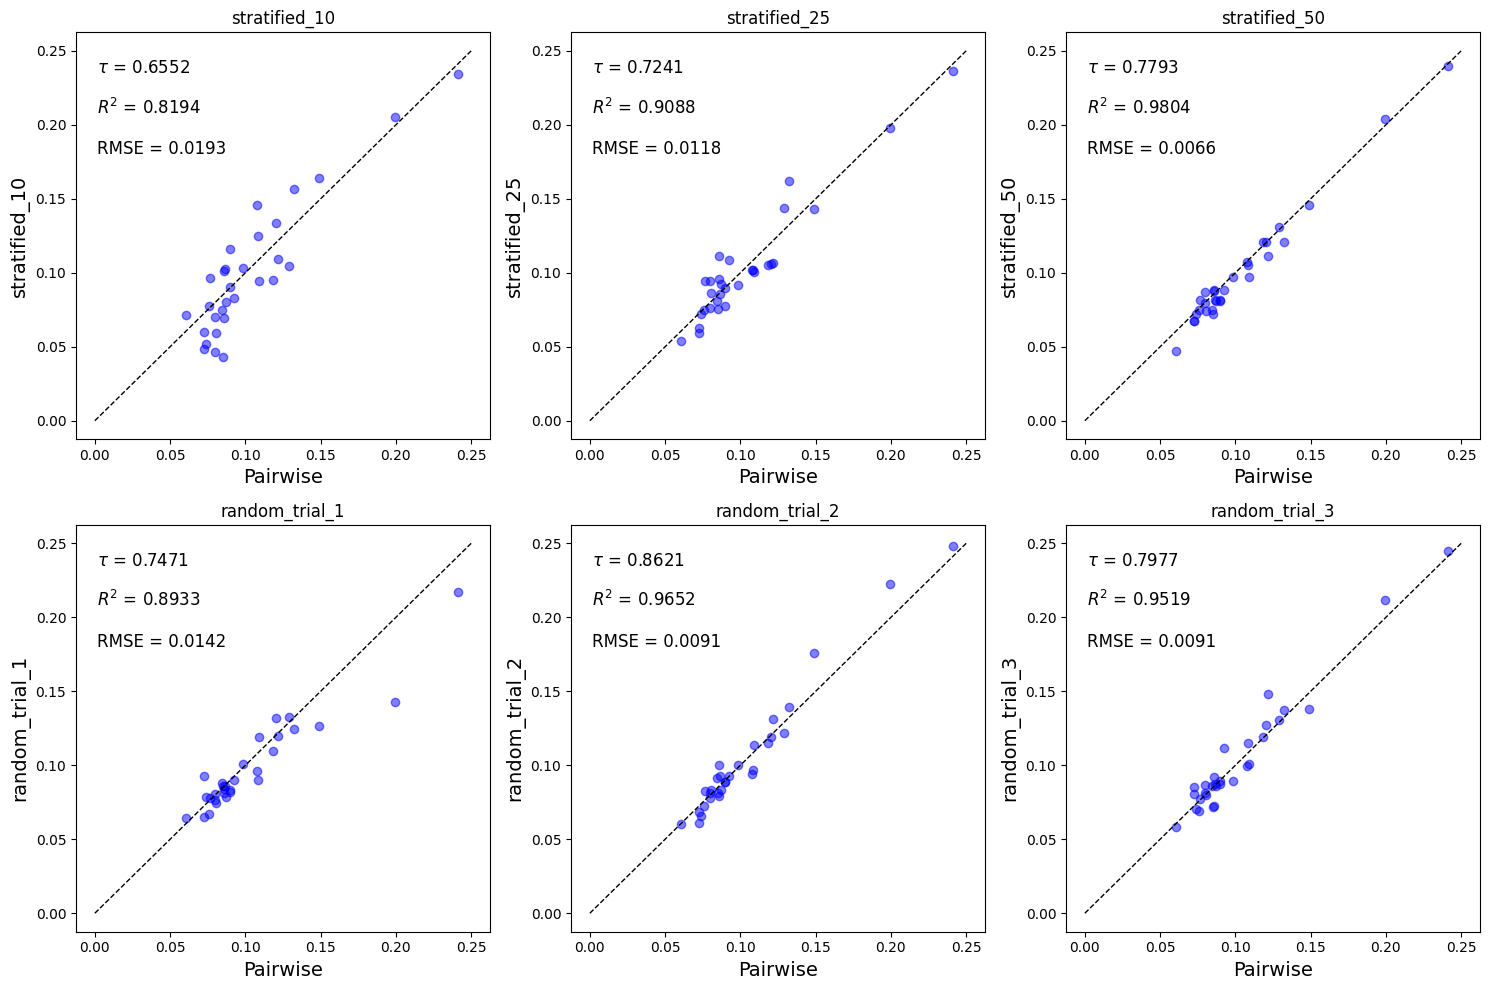

In [8]:
# Plot the results in a 6 panel figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, method in enumerate(df.columns[1:]):
    axs[i].scatter(df['pairwise'], df[method], alpha=0.5, color = 'blue')
    axs[i].set_xlabel('Pairwise', fontsize=14)
    axs[i].set_ylabel(method, fontsize=14)
    axs[i].set_title(f'{method}')
    axs[i].plot([0, 0.25], [0, 0.25], color='black', lw=1, linestyle='--')

    # Annotation of the Kendall's tau correlation coefficient, R^2 value and RMSE
    tau, _ = kendalltau(df['pairwise'], df[method])
    axs[i].annotate(f'$\\tau$ = {tau:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    R2 = np.corrcoef(df['pairwise'], df[method])[0, 1]**2
    axs[i].annotate(f'$R^2$ = {R2:.4f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)
    RMSE = np.sqrt(np.mean((df['pairwise'] - df[method])**2))
    axs[i].annotate(f'RMSE = {RMSE:.4f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/francesca_ecfp4_{sim_index}.png')


### MACCS

In [9]:
# Computation of the standard deviation of the Tanimoto similarities for the complete sets of compounds, stratified sampling, random sampling.
pairwise_sigmas = []
stratified_10 = []
stratified_25 = []
stratified_50 = []
random_trial_1 = []
random_trial_2 = []
random_trial_3 = []

for file in glob.glob("maccs/*.npy"):
    # Load the fingerprints
    fps = np.load(file, mmap_mode='r')

    # Calculate the pairwise Tanimoto similarities standard deviation
    pairwise_sigmas.append(pairwise_average(fps, n_ary=sim_index)[1])

    # Calculate the stratified sampling Tanimoto similarities standard deviation, with 10, 25, 50 sampled compounds
    stratified_10.append(stratified_sigma(fps, 10, sim_index))
    stratified_25.append(stratified_sigma(fps, 25, sim_index))
    stratified_50.append(stratified_sigma(fps, 50, sim_index))

    # Calculate the random sampling Tanimoto similarities standard deviation, all sampling 50 compounds
    random_trial_1.append(random_sigma(fps, 50, sim_index))
    random_trial_2.append(random_sigma(fps, 50, sim_index))
    random_trial_3.append(random_sigma(fps, 50, sim_index))

# Create a dataframe with the results
df = pd.DataFrame({
    'pairwise': pairwise_sigmas,
    'stratified_10': stratified_10,
    'stratified_25': stratified_25,
    'stratified_50': stratified_50,
    'random_trial_1': random_trial_1,
    'random_trial_2': random_trial_2,
    'random_trial_3': random_trial_3
})

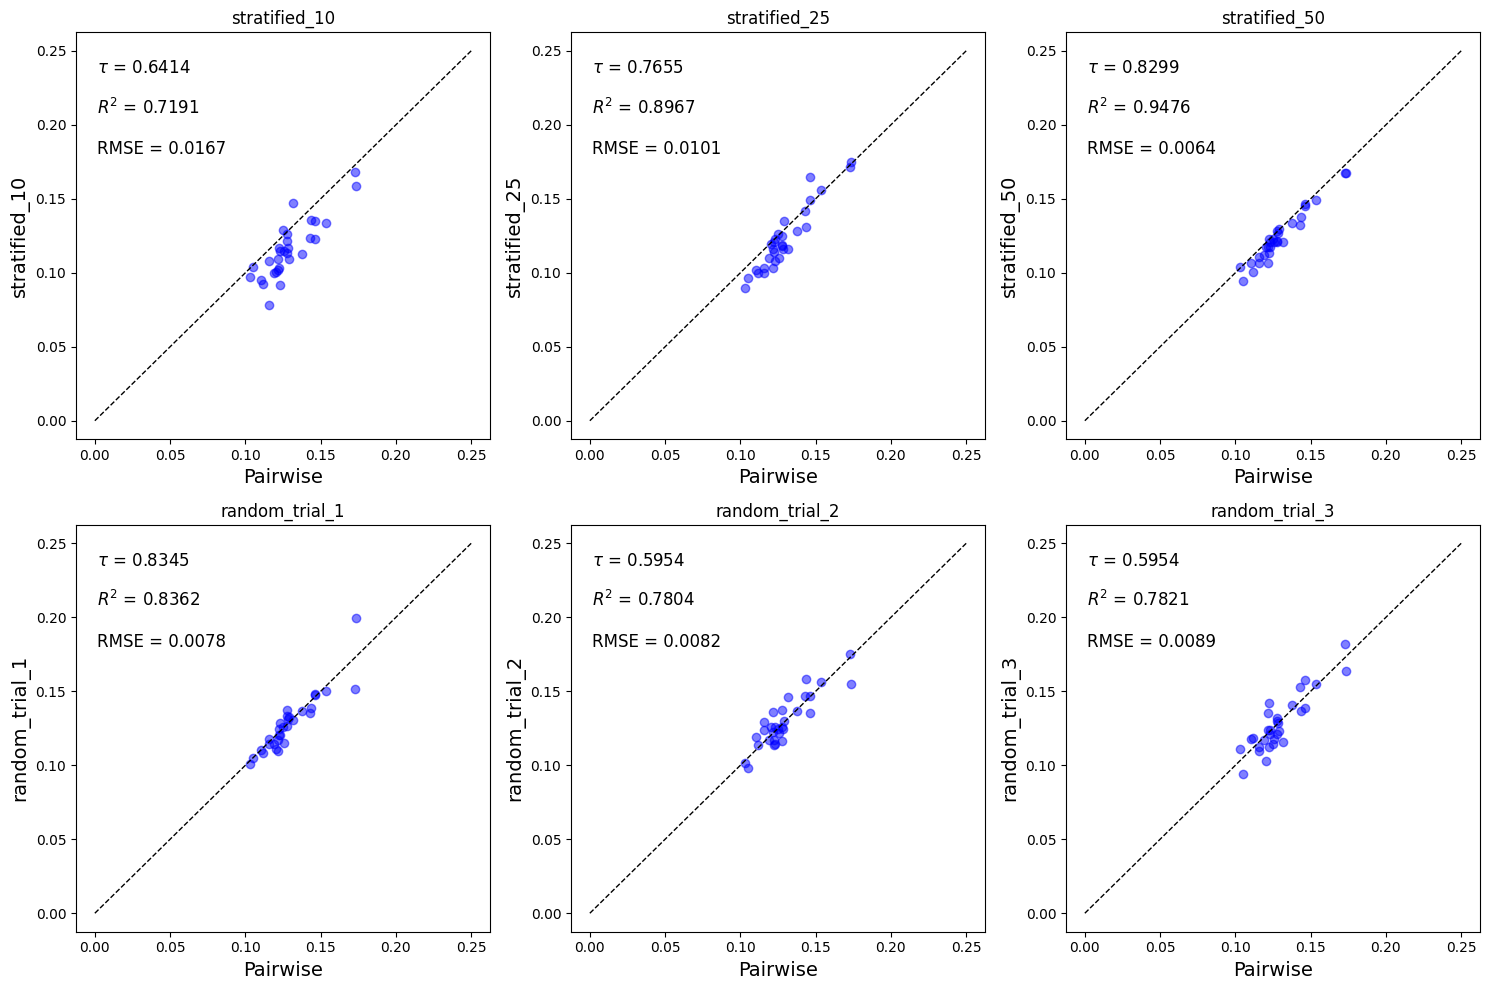

In [10]:
# Plot the results in a 6 panel figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, method in enumerate(df.columns[1:]):
    axs[i].scatter(df['pairwise'], df[method], alpha=0.5, color = 'blue')
    axs[i].set_xlabel('Pairwise', fontsize=14)
    axs[i].set_ylabel(method, fontsize=14)
    axs[i].set_title(f'{method}')
    axs[i].plot([0, 0.25], [0, 0.25], color='black', lw=1, linestyle='--')

    # Annotation of the Kendall's tau correlation coefficient, R^2 value and RMSE
    tau, _ = kendalltau(df['pairwise'], df[method])
    axs[i].annotate(f'$\\tau$ = {tau:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    R2 = np.corrcoef(df['pairwise'], df[method])[0, 1]**2
    axs[i].annotate(f'$R^2$ = {R2:.4f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)
    RMSE = np.sqrt(np.mean((df['pairwise'] - df[method])**2))
    axs[i].annotate(f'RMSE = {RMSE:.4f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/francesca_maccs_{sim_index}.png')


### Results on the application of iSIM sigma on ChEMBL subsets

To further analyze our strategies, we tested each of the above proposed methods on ChEMBL subsets. The results correspond to the output of the `isim_sigma_chunks.py` and `isim_sigma_size.py` scripts. In this script, from the `chembl_33` data base ordered by pop_count, two random chunks of sizes between 1000 and 5000 were selected and combined. This strategy was done to cover larger ranges of standard deviation, since simply selecting random molecules from the set would result in the calculation of almost the same value every time. All molecules were represented with RDKit fingerprints (n=2048).

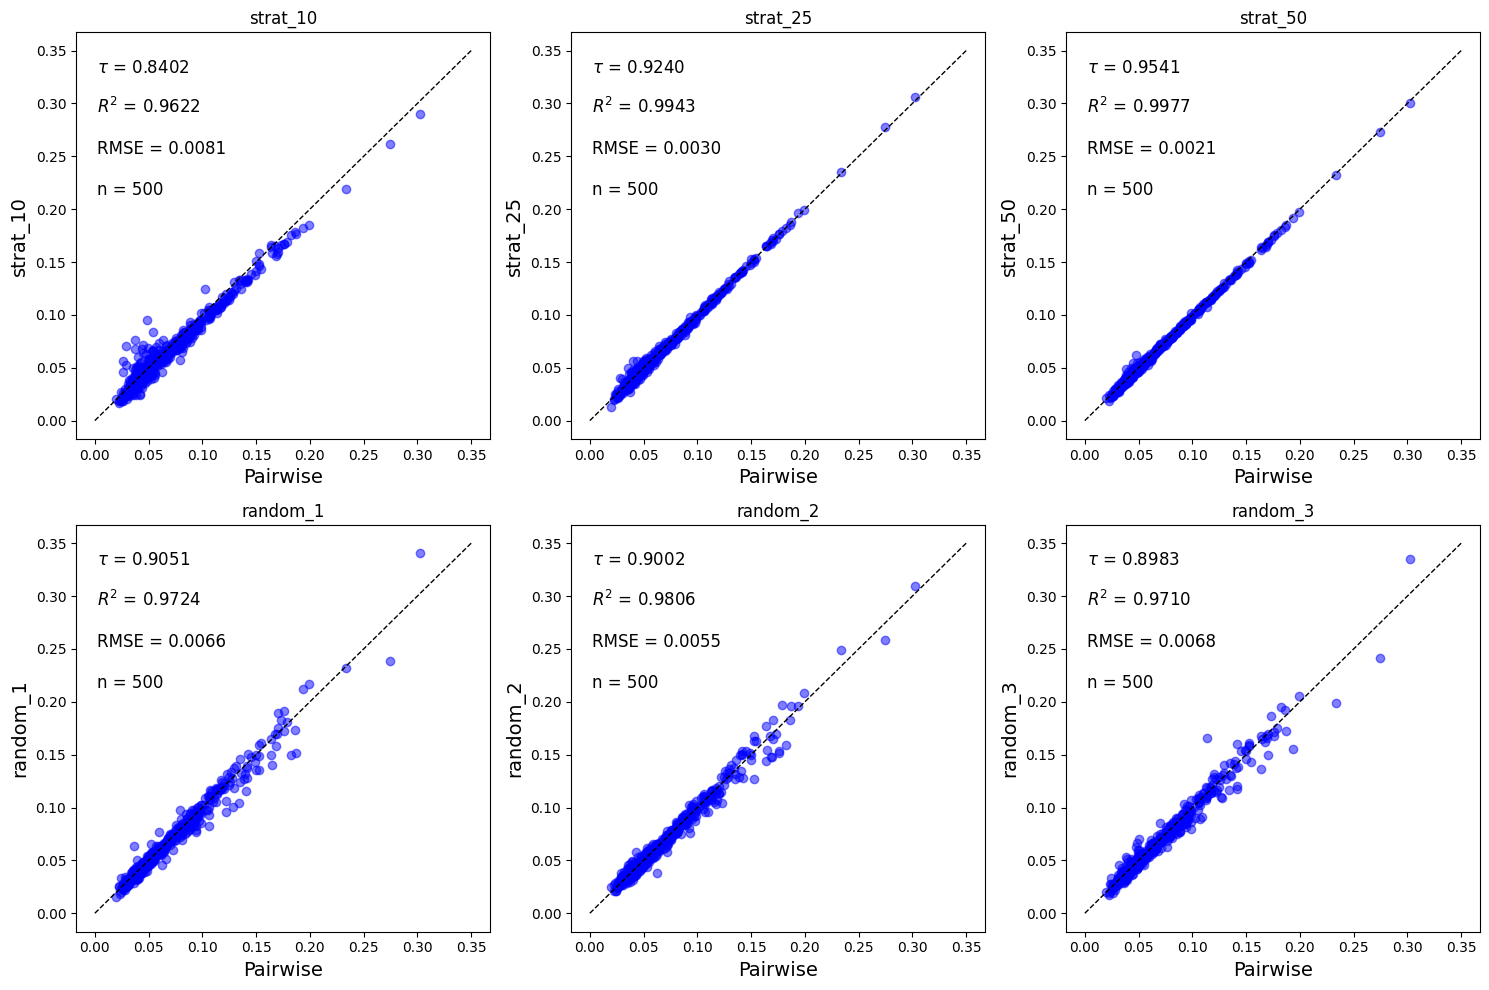

In [11]:
df = pd.read_csv(f'isim_sigma_results/isim_sigma_{sim_index}.csv')

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, method in enumerate(df.columns[2:8]):
    axs[i].scatter(df['rdkit'], df[method], alpha=0.5, color = 'blue')
    axs[i].set_xlabel('Pairwise', fontsize=14)
    axs[i].set_ylabel(method, fontsize=14)
    axs[i].set_title(f'{method}')
    axs[i].plot([0, 0.35], [0, 0.35], color='black', lw=1, linestyle='--')

    # Annotation of the Kendall's tau correlation coefficient, R^2 value and RMSE
    tau, _ = kendalltau(df['rdkit'], df[method])
    axs[i].annotate(f'$\\tau$ = {tau:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    R2 = np.corrcoef(df['rdkit'], df[method])[0, 1]**2
    axs[i].annotate(f'$R^2$ = {R2:.4f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)
    RMSE = np.sqrt(np.mean((df['rdkit'] - df[method])**2))
    axs[i].annotate(f'RMSE = {RMSE:.4f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
    n = len(df)
    axs[i].annotate(f'n = {n}', xy=(0.05, 0.6), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/isim_sigma_{sim_index}.png')


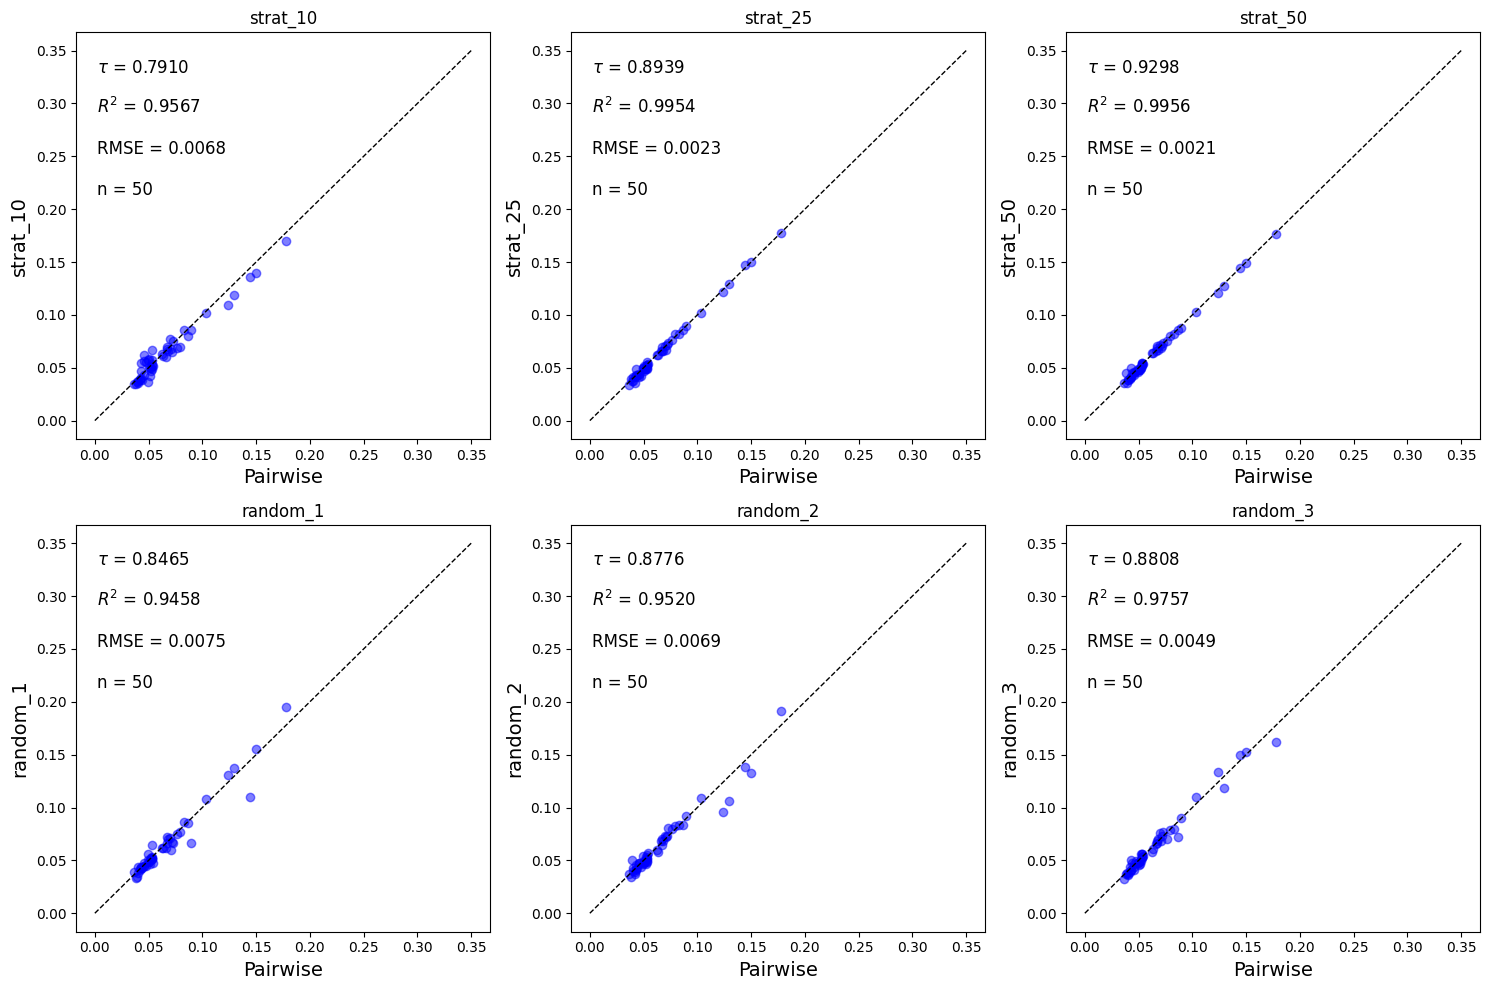

In [12]:
# Load the results for JT
df = pd.read_csv(f'isim_sigma_results/isim_sigma_size_{sim_index}.csv')

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, method in enumerate(df.columns[2:8]):
    axs[i].scatter(df['rdkit'], df[method], alpha=0.5, color = 'blue')
    axs[i].set_xlabel('Pairwise', fontsize=14)
    axs[i].set_ylabel(method, fontsize=14)
    axs[i].set_title(f'{method}')
    axs[i].plot([0, 0.35], [0, 0.35], color='black', lw=1, linestyle='--')

    # Annotation of the Kendall's tau correlation coefficient, R^2 value and RMSE
    tau, _ = kendalltau(df['rdkit'], df[method])
    axs[i].annotate(f'$\\tau$ = {tau:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    R2 = np.corrcoef(df['rdkit'], df[method])[0, 1]**2
    axs[i].annotate(f'$R^2$ = {R2:.4f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)
    RMSE = np.sqrt(np.mean((df['rdkit'] - df[method])**2))
    axs[i].annotate(f'RMSE = {RMSE:.4f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
    n = len(df)
    axs[i].annotate(f'n = {n}', xy=(0.05, 0.6), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/isim_sigma_size_{sim_index}.png')

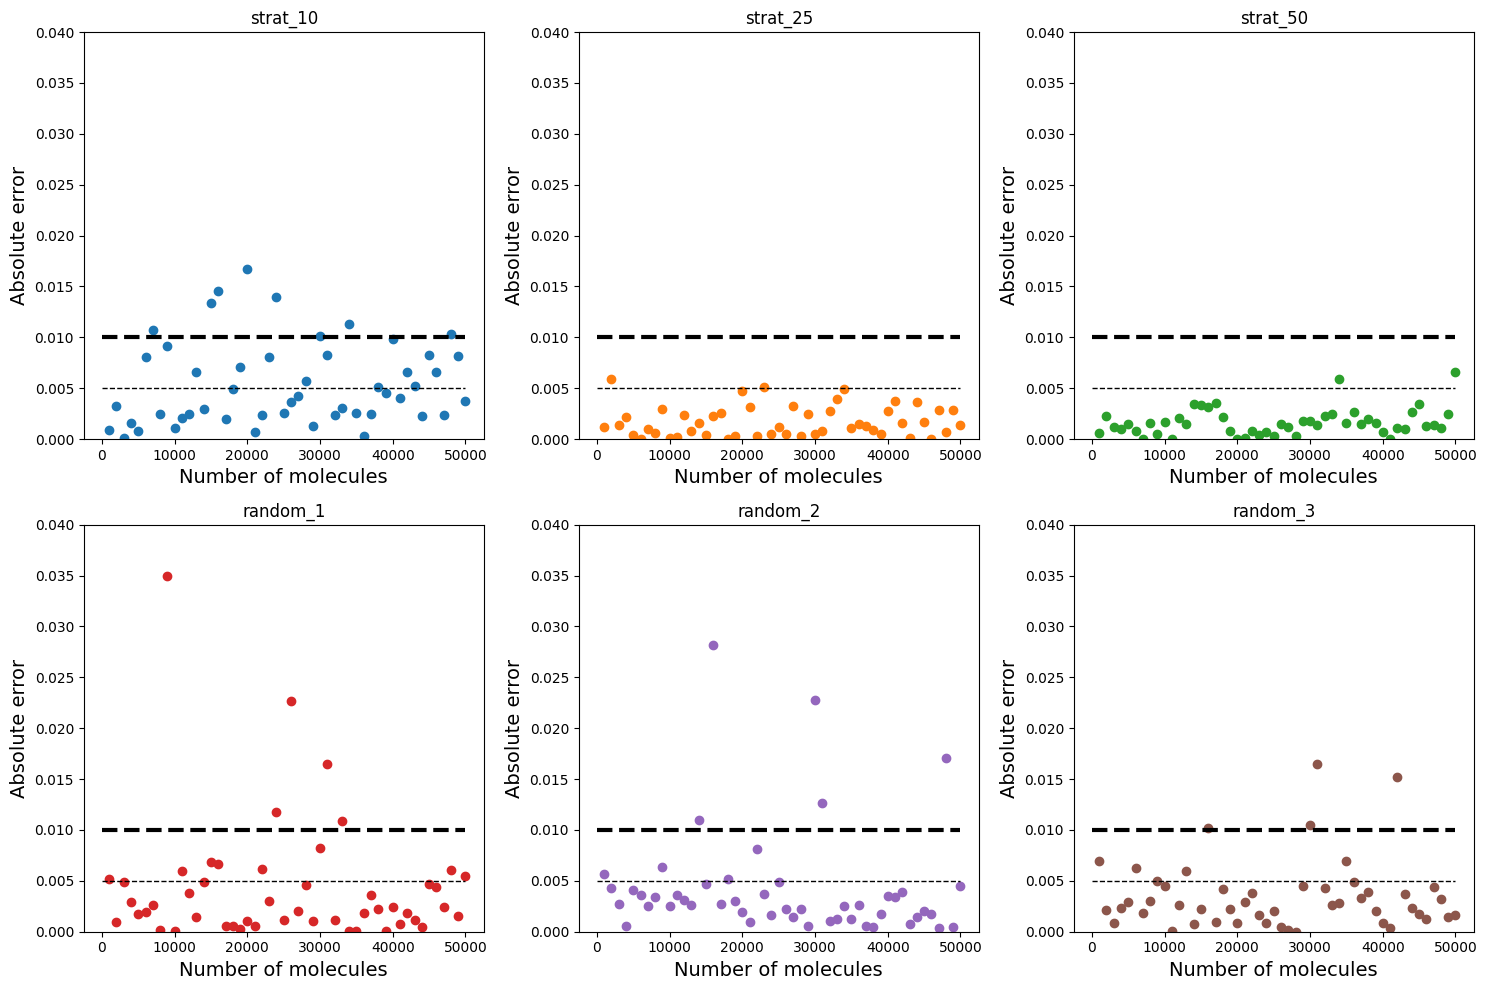

In [13]:
# Load the results
df = pd.read_csv(f'isim_sigma_results/isim_sigma_size_{sim_index}.csv')

# Get the errors 
errors = {}
for method in ['strat_10', 'strat_25', 'strat_50', 'random_1', 'random_2', 'random_3']:
    errors[method] = np.abs(df[method] - df['rdkit'])
    
# Plot the number of absolute errors vs the number of molecules for each method in a different pannel 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, method in enumerate(errors.keys()):
    axs[i].scatter(df['n_subset'], errors[method], color=plt.cm.tab10(i))
    axs[i].set_xlabel('Number of molecules', fontsize=14)
    axs[i].set_ylabel('Absolute error', fontsize=14)
    axs[i].set_title(f'{method}')
    axs[i].plot([0, 50000], [0.01, 0.01], color='black', lw=3, linestyle='--')
    axs[i].plot([0, 50000], [0.005, 0.005], color='black', lw=1, linestyle='--')

    # Set fixed y-axis limits
    axs[i].set_ylim(0, 0.04)

# Show the results
plt.tight_layout()
plt.savefig(f'figures/isim_sigma_size_{sim_index}_errors.png')
plt.show()

### Timing plots

Use the results from the ChEMBL33 subsets

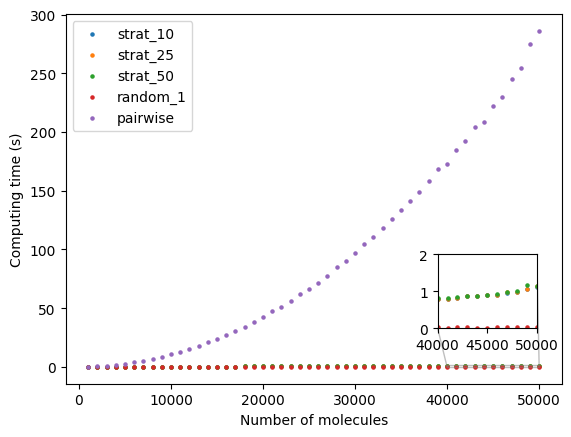

In [14]:
# Read the timing results 
sim_index = 'JT'
df = pd.read_csv(f'isim_sigma_results/isim_sigma_size_{sim_index}_times.csv')

# Plot the results
fig, ax = plt.subplots()
for method in ['strat_10', 'strat_25', 'strat_50', 'random_1', 'pairwise']:
    ax.scatter(df['n_subset'], df[method], label=method, marker='o', s=5)

# Do a zoom-in plot on the 40K-50K range
axins = ax.inset_axes([0.75, 0.15, 0.2, 0.2])
for method in ['strat_10', 'strat_25', 'strat_50', 'random_1']:
    axins.scatter(df['n_subset'], df[method], label=method, marker='o', s=5)
axins.set_xlim(40000, 50000)
axins.set_ylim(0, 2)
ax.indicate_inset_zoom(axins)

ax.set_xlabel('Number of molecules')
ax.set_ylabel('Computing time (s)')

ax.legend()
plt.savefig(f'figures/isim_sigma_size_{sim_index}_times.png', dpi=400)

### Fast exact approach

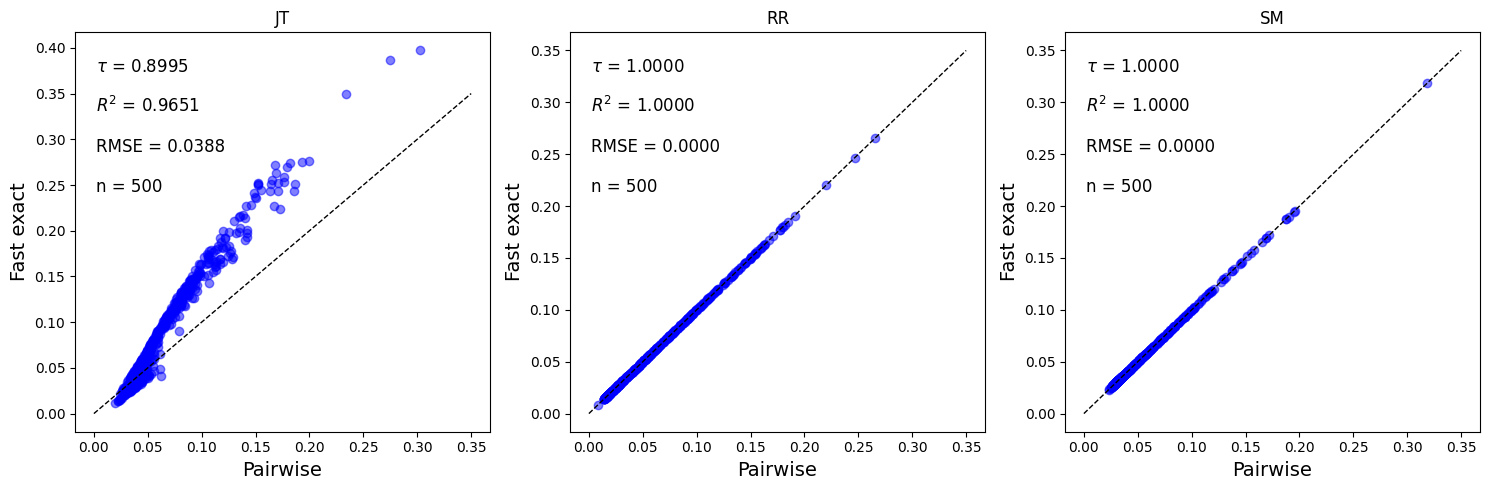

In [17]:
sim_indexes = ['JT', 'RR', 'SM']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, sim_index_ in enumerate(sim_indexes):
    df = pd.read_csv(f'isim_sigma_results/isim_sigma_{sim_index_}.csv')
    axs[i].scatter(df['rdkit'], df['fast_exact'], alpha=0.5, color = 'blue')
    axs[i].set_xlabel('Pairwise', fontsize=14)
    axs[i].set_ylabel('Fast exact', fontsize=14)

    # Annotation of the Kendall's tau correlation coefficient, R^2 value and RMSE
    tau, _ = kendalltau(df['rdkit'], df['fast_exact'])
    axs[i].annotate(f'$\\tau$ = {tau:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    R2 = np.corrcoef(df['rdkit'], df['fast_exact'])[0, 1]**2
    axs[i].annotate(f'$R^2$ = {R2:.4f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)
    RMSE = np.sqrt(np.mean((df['rdkit'] - df['fast_exact'])**2))
    axs[i].annotate(f'RMSE = {RMSE:.4f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
    n = len(df)
    axs[i].annotate(f'n = {n}', xy=(0.05, 0.6), xycoords='axes fraction', fontsize=12)

    axs[i].plot([0, 0.35], [0, 0.35], color='black', lw=1, linestyle='--')

    axs[i].set_title(f'{sim_index_}')

plt.tight_layout()
plt.savefig('figures/isim_sigma_fast_exact.png')
